In [2]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [7]:
df = pd.read_csv('Position_CSV/LB_dat.csv')
df.head()

,Unnamed: 0,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,1,Emmanuel Acho,2,20,1.600000,Career,NaN,98.0,NaN,0.0,...,1.0,0.0,NaN,NaN,NaN,0.0,70.0,35.0,NaN,NaN
1,2,Matthew Adams,6,32,3.000000,Career,NaN,97.0,NaN,NaN,...,NaN,NaN,237.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3,Michael Adams,7,80,1.400000,Career,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,4,Xavier Adibi,4,44,1.454545,Career,NaN,154.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,35.0,170.0,21.3,NaN,NaN
4,5,Spencer Adkins,2,24,1.333333,Career,NaN,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,13.0,13.0,NaN,NaN


In [8]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [9]:
df.fillna(0, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['assists_on_tackles', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'other_touchdowns', 'passes_defended', 'plays_from_scrimmage', 'points', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.0788108679068964
Weights:  [-2.36402729e-03 -8.83545903e-02  1.81422466e-01  2.18969360e-01
 -1.25831337e-02 -6.43595482e-02 -6.37684350e-15  1.64621672e-02
  2.70559241e-02  1.56959028e+00  1.95221611e-03 -5.11882777e+00
  9.54386704e-04  1.76651777e-02 -1.40964058e-03 -9.24286659e+00
 -1.19239425e-02 -5.75332375e-04 -5.58417308e-03]


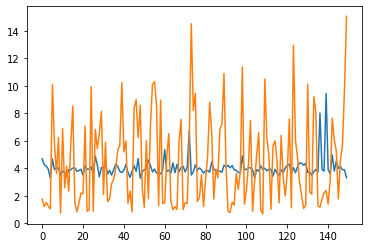

In [11]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['other_touchdowns', 'solo_tackles', 'yards_recovered_from_fumble']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.008009574522977791
Weights:  [ 0.          0.00245475 -0.00186633]


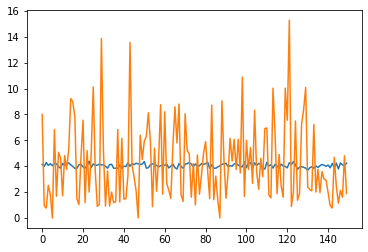

In [13]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  -0.008009574425849264
Weights:  [ 0.          0.00245475 -0.00186632]


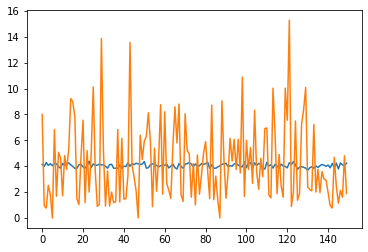

In [14]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [15]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.020339075010083658
[ 0.          0.0013521  -0.00340057]

Ridge Regression
-0.022063210671759887
[ 0.          0.00134508 -0.00349959]
